# 🧠 ML Project: Goal Prediction from Player Statistics

## Step 1: Problem Definition

The goal of this project is to build a supervised machine learning model that predicts the number of goals a football player will score, based on their historical performance statistics.

## Step 2: Load Dataset

In [6]:
import pandas as pd

# Ruta del archivo CSV
ruta = r'C:\\Users\\johan\\OneDrive\\Escritorio\\EDA\\dataset - 2020-09-24.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()



,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [7]:

import pandas as pd

ruta = r'C:\\Users\\johan\\OneDrive\\Escritorio\\EDA\\dataset - 2020-09-24.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta)

# Ver el tamaño del DataFrame y una muestra
print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (571, 59)


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


Carga y limpieza de datos

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Cargar dataset
ruta = r'C:\\Users\\johan\\OneDrive\\Escritorio\\EDA\\dataset - 2020-09-24.csv'
df = pd.read_csv(ruta)

# Reemplazar valores nulos por 0
df.fillna(0, inplace=True)

## Step 3: Select Features and Target

In [12]:
print(df.columns.tolist())


['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match', 'Headed goals', 'Goals with right foot', 'Goals with left foot', 'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %', 'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big chances created', 'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides']


In [13]:
# Definir features y target
features = [
    'Age',
    'Appearances',
    'Shots',
    'Shots on target',
    'Assists',
    'Big chances created',
    'Passes',
    'Crosses',
    'Through balls',
    'Fouls',
    'Offsides'
]

X = df[features]
y = df['Goals']


## Step 4: Split Data into Train and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

# Dividir el dataset (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Step 4: Split Data into Train and Test Sets

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Step 5: Train Random Forest Regressor

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R²: {r2:.2f}")


📉 RMSE: 3.05
📈 R²: 0.94


## Step 7: Visualize Predictions

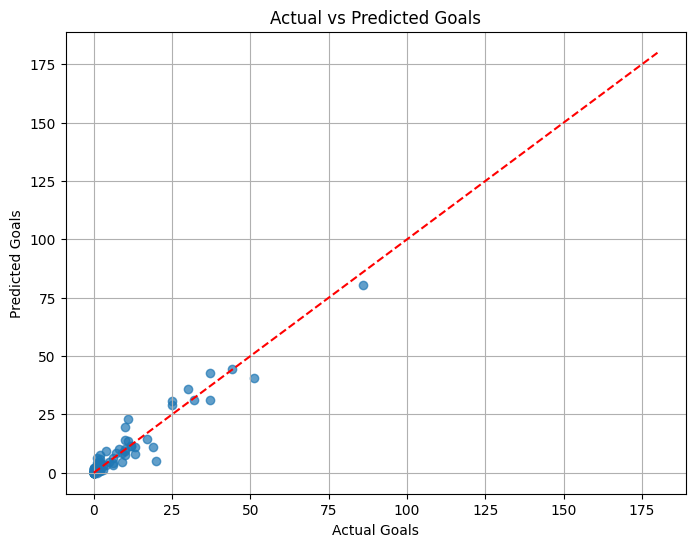

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

## Step 8: Save Model

In [21]:
import os
import joblib

# Crear el directorio si no existe
model_path = "../../src/models"
os.makedirs(model_path, exist_ok=True)

# Guardar el modelo
joblib.dump(model, os.path.join(model_path, "modelo_entrenado.pkl"))


['../../src/models\\modelo_entrenado.pkl']

In [22]:
import joblib

# Save the trained model
joblib.dump(model, "../../src/models/modelo_entrenado.pkl")

['../../src/models/modelo_entrenado.pkl']